# <span style="color:red"> Numerical Simulation 08 </span>

## Exercise 08.1-2

The aim of this exercise was to create a code that can compute the expectation value for the Hamiltonian of a single quantum particle in 1D, confined by the following external potential $V(x) = x^4 - \frac{5}{2}x^2$, and then use it to variationally optimize the ground state starting from the following trial wave function: 
$$ \Psi_T^{\sigma,\mu}(x) = e^{-\frac{(x-\mu)^2}{2\sigma^2}}+e^{-\frac{(x+\mu)^2}{2\sigma^2}}$$

The code uses a simple Metropolis to sample $|\Psi_T(x)|^2$, with uniform trasition probability, and then uses the sampled values to evaluate 
$$\langle {\hat H} \rangle_T  =\langle \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} \rangle$$ 
where ${\hat H} \Psi_T(x)=-\frac{1}{2} \frac{d^2}{dx^2}(\Psi_T(x)) +V(x)\Psi_T(x)$, using $\hbar=1$ and $m=1$.

I've also used data blocking to calculate mean and standard deviation of the mean, using $M=10^6$ steps divided in $N=100$ blocks

Optimization was made in two steps:
- The first step was a larger sampling, in which I used a double cicle on $\sigma$ and $\mu$, starting from $0$ and incrementing them of $0.05$ each time. In this way I founded a minimum for $\sigma=0.6$ and $\mu=0.8$.
- Once I've found and estimation of the values of the parameters for the minimun I've made a finer sampling, in a restricted region around the minimun, incrementing my parameters of $0.005$, and I've found better values for them: $\sigma=0.62$ $\mu=0.795$

With these values I've re-runned the code, andjusting the acceptance (that in the big cycle with all the parameters was very difficult to have always at 50%, even if I've tried to keep it not to low and not to high), and then plotted the $\langle {\hat H} \rangle_T$, for the optimized ground state. The expectational value computed with the analytical method is $E=-0.460$. Of course this is a variational method, so I haven't obtained the exact value for energy, but ah higher one, because the wave function it's not exact, but I've found a value that's at least around it. 

For the second plot I've filled an histogram with the sampled configurations of $|\Psi_T(x)|^2$ and then compared it with the analytic solution. You can see that the wave function it's similar to the exact one, but not identical (that's why the energy it's not compatible with the expectational one).



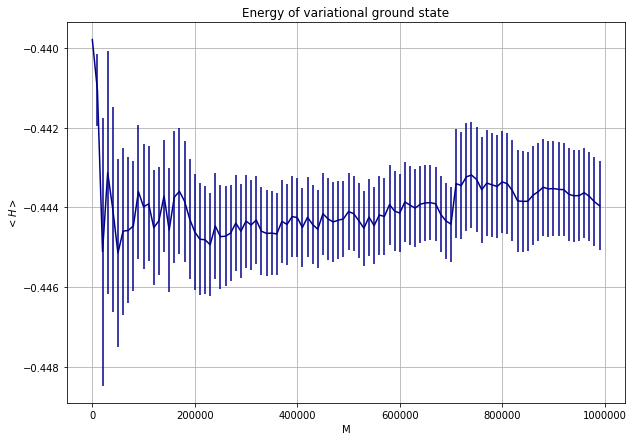

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.arange(100)
x*=10000

En, err =np.loadtxt("output.energy", unpack=True)

fig=plt.figure(figsize=(10,7))
plt.errorbar(x, En, yerr=err, color="darkblue")
plt.xlabel('M')
plt.ylabel('$<H>$')
plt.title("Energy of variational ground state")
plt.grid(True)

plt.show()

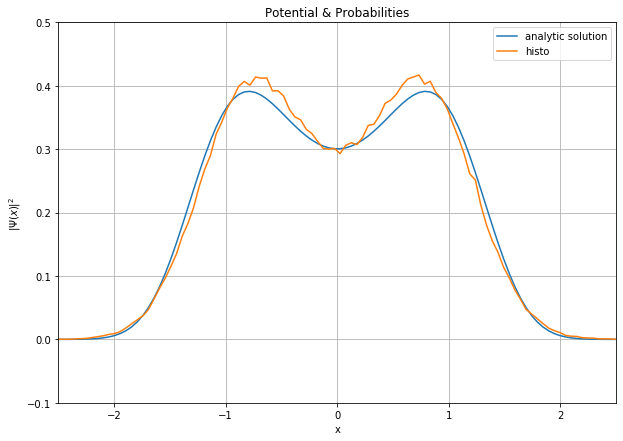

In [3]:
histo=np.loadtxt("output.radius")

def Vpot(x):
    return (x**2 - 2.5)*x**2

hbar = 1
m = 1
a = 5
N = 100 

x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0]
V = Vpot(x)
CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)
# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

plt.figure(figsize=(10,7))
scale = 0.3
plt.plot(x,(psi[0])**2, label="analytic solution")
plt.plot(x, histo, label="histo")
plt.title("Potential & Probabilities")

plt.xlabel("x")
plt.ylabel('$|\Psi(x)|^2$')
plt.grid(True)
plt.xlim((-2.5,2.5))
plt.ylim((-0.1,0.5))
plt.legend()

plt.show()

## Exercise 08.3

### PIGS (T=0) 

In these three plots you can see the comparison of results computed at **T=0**, with $\Psi_T(x)=1$ and the optimized one $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$, found in exercise 8.2.
We can clearly see that in the central timeslices the results are the same, between the two $\psi$. The difference is clear in the initial and ending region, were using $\Psi_T(x)=1$ we have the potential energy that rise up, and the kinetic energy that goes down (less evident). This is due to the fact that the constant function is a lot different from the real ground state, so the propagated state and the original one can be really different, and so their product. The total energy is computed as the sum of the two, and is clear that is compatible with the one obtained in the ex 8.2, but it fluctuates a lot. We can compute total energy in every region, because the total energy is a conserved quantity. It seems that the best points were take values of the total energy are the begin and the end, where the ucertainties are smaller.

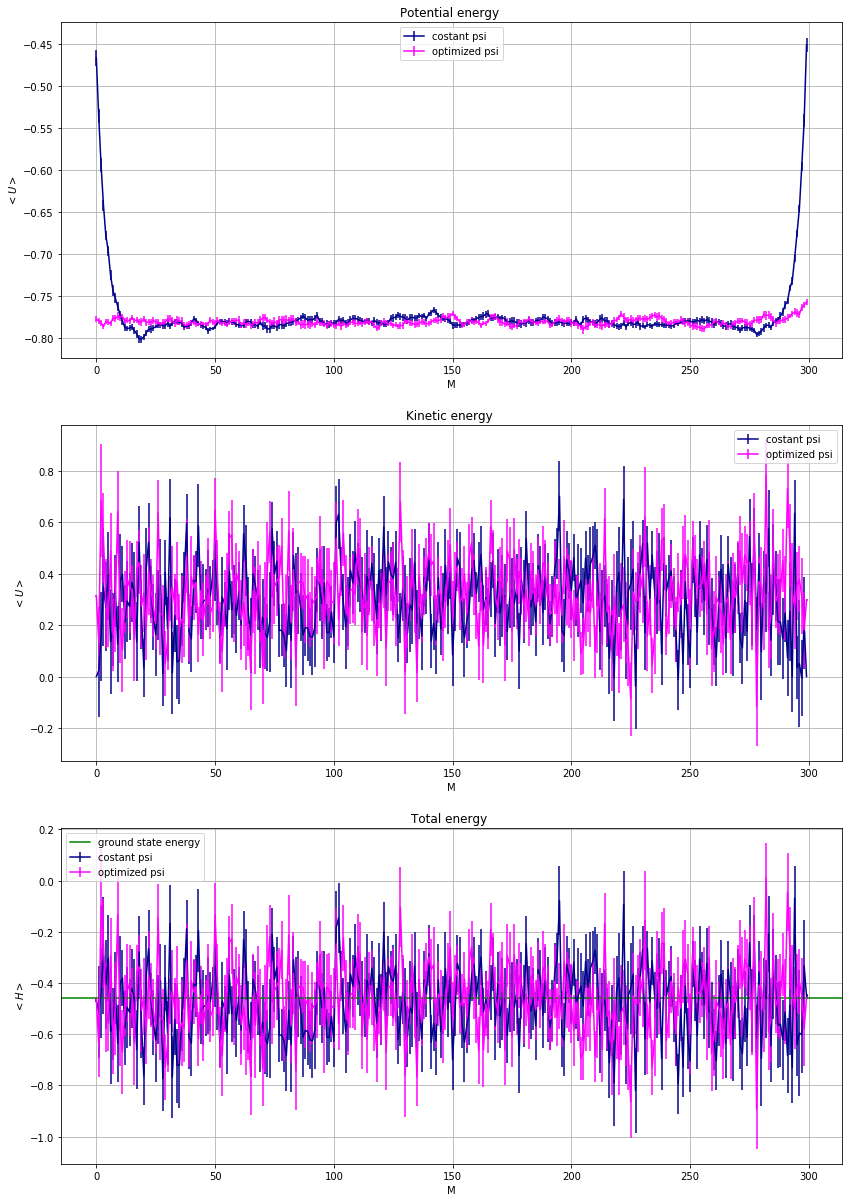

In [4]:
x = np.arange(300)
En, err =np.loadtxt("potential.00", usecols=(1,2), unpack=True)
En1, err1=np.loadtxt("potential.01", usecols=(1,2), unpack=True)

fig=plt.figure(figsize=(14,21))
plt.subplot(311)
plt.errorbar(x, En, yerr=err, color="darkblue", label="costant psi")
plt.errorbar(x, En1, yerr=err1, color="magenta", label="optimized psi")
plt.xlabel('M')
plt.ylabel('$<U>$')
plt.title("Potential energy ")
plt.legend()
plt.grid(True)

plt.subplot(312)
kin, errk =np.loadtxt("kinetic.00", usecols=(1,2), unpack=True)
kin1, errk1=np.loadtxt("kinetic.01", usecols=(1,2), unpack=True)
plt.errorbar(x, kin, yerr=errk, color="darkblue", label="costant psi")
plt.errorbar(x, kin1, yerr=errk1, color="magenta", label="optimized psi")
plt.xlabel('M')
plt.ylabel('$<U>$')
plt.title("Kinetic energy ")
plt.legend()
plt.grid(True)

plt.subplot(313)
plt.errorbar(x, En+kin, yerr=pow(err*err+errk*errk,0.5), color="darkblue", label="costant psi")
plt.errorbar(x, En1+kin1, yerr=pow(err1*err1+errk1*errk1,0.5), color="magenta", label="optimized psi")
plt.axhline( -0.4604659,0,300, color="green",label="ground state energy")
plt.xlabel('M')
plt.ylabel('$<H>$')
plt.title("Total energy ")
plt.legend()
plt.grid(True)


plt.show()

For the probability distribution we can see that there is no difference in which $\Psi_T(x)$ we are using, and that they are both "good". Indeed the analytic solution is in the range of uncertainties of the PIGS. 

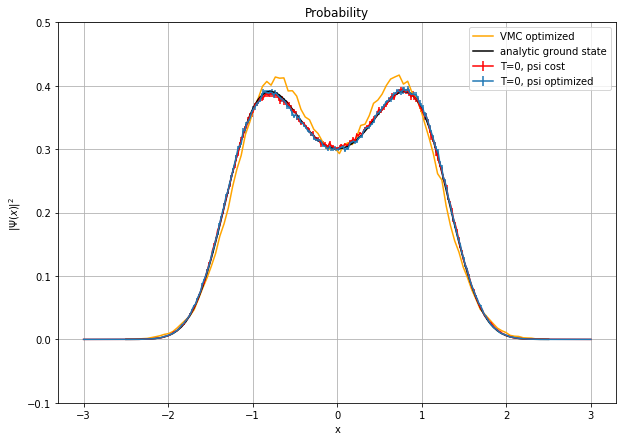

In [5]:
x = np.linspace(-3,3,300)
x2=np.linspace(-2.5,2.5,100)

histo, err=np.loadtxt("probability.00", usecols=(1,2), unpack=True)
histo1, err1=np.loadtxt("probability.01", usecols=(1,2), unpack=True)
histo2=np.loadtxt("output.radius")
fig=plt.figure(figsize=(10,7))

plt.errorbar(x, histo, yerr=err,label="T=0, psi cost", color="red")
plt.errorbar(x, histo1, yerr=err1, label="T=0, psi optimized")
plt.plot(x2, histo2, label="VMC optimized", color="orange")
plt.plot(x2,(psi[0])**2, label="analytic ground state", color="black")

plt.xlabel('x')
plt.ylabel('$|\Psi(x)|^2$')
plt.title("Probability")
plt.ylim((-0.1,0.5))
plt.legend()
plt.grid(True)

plt.show()

Using $\Psi_T^{\sigma,\mu}(x)$ we can try to reduce the imaginary time propagation, because the function is similar to the exact one, so maybe it's not necessary the same time needed for the constant one. Indeed, as we can se from the following plots, I've checked that I can reduce the time from $\tau=8$ to $\tau=1$. Going under 1 the resuts are different and the function is no more compatible with the analytic one. Using $\tau=1$ and $\tau=0.5$ it wasn't possible to reduce acceptance of Brownian motion and Brownian bridge under 60%.
The difference using  $\Psi_T(x)=1$ is clear, even $\tau=3$ is not enough to have consistent results.

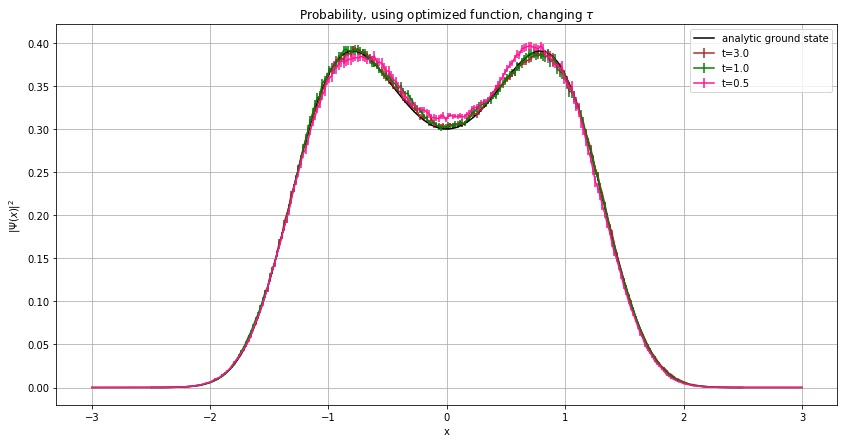

In [6]:
histo1, err1=np.loadtxt("probability.01.1", usecols=(1,2), unpack=True)
histo2, err2=np.loadtxt("probability.01.2", usecols=(1,2), unpack=True)
histo3, err3=np.loadtxt("probability.01.3", usecols=(1,2), unpack=True)

fig=plt.figure(figsize=(14,7))
plt.errorbar(x, histo1, yerr=err1, color="brown", label="t=3.0")
plt.errorbar(x, histo2, yerr=err2, color="green", label="t=1.0")
plt.errorbar(x, histo3, yerr=err3, color="deeppink", label="t=0.5")
plt.plot(x2,(psi[0])**2, label="analytic ground state", color="black")

plt.xlabel('x')
plt.ylabel('$|\Psi(x)|^2$')
plt.title(r"Probability, using optimized function, changing $\tau$")
plt.legend()
plt.grid(True)

plt.show()

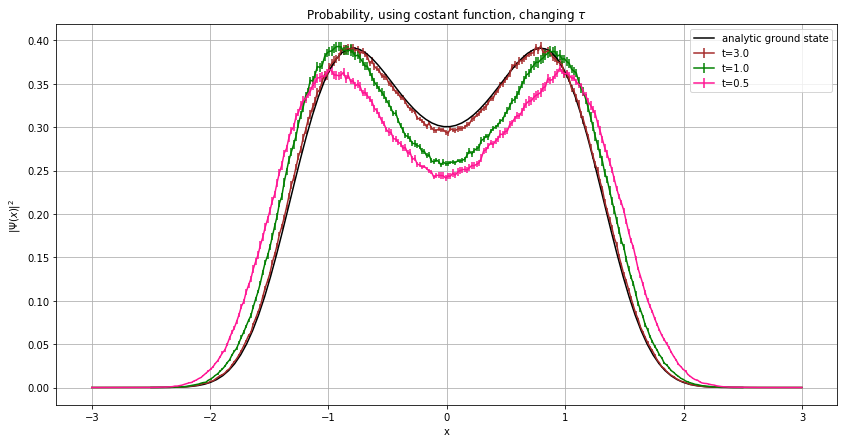

In [7]:
histo1, err1=np.loadtxt("probability.00.1", usecols=(1,2), unpack=True)
histo2, err2=np.loadtxt("probability.00.2", usecols=(1,2), unpack=True)
histo3, err3=np.loadtxt("probability.00.3", usecols=(1,2), unpack=True)

fig=plt.figure(figsize=(14,7))
plt.errorbar(x, histo1, yerr=err1, color="brown", label="t=3.0")
plt.errorbar(x, histo2, yerr=err2, color="green", label="t=1.0")
plt.errorbar(x, histo3, yerr=err3, color="deeppink", label="t=0.5")
plt.plot(x2,(psi[0])**2, label="analytic ground state", color="black")

plt.xlabel('x')
plt.ylabel('$|\Psi(x)|^2$')
plt.title(r"Probability, using costant function, changing $\tau$")
plt.legend()
plt.grid(True)

plt.show()

To complete this study I've printed also the values of the total energy, changing $\tau$, for both $\psi$. The total energy is obtained summing potential and kinetic energy for the first timeslice. From the plot below we can see that for the optimized wave function the results are always in range with the exact value, while for the constant wave function it diverge reducing $\tau$.

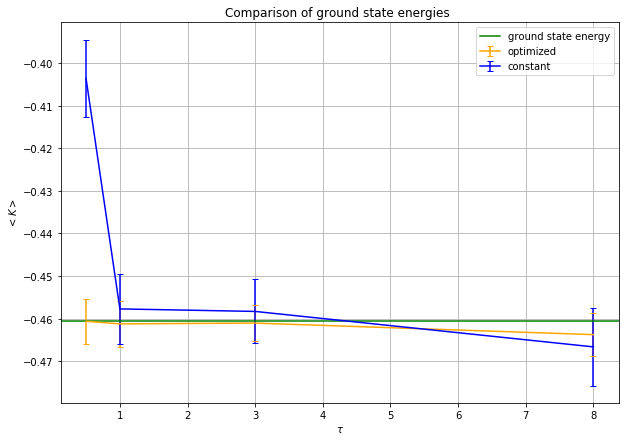

In [8]:
x=np.zeros(4); enopt=np.zeros(4); encost=np.zeros(4); erropt=np.zeros(4); errcost=np.zeros(4)
pot, errp =np.loadtxt("potential.01", usecols=(1,2), unpack=True, max_rows=(1))
pot1, errp1=np.loadtxt("potential.01.1", usecols=(1,2), unpack=True, max_rows=(1))
pot2, errp2=np.loadtxt("potential.01.2", usecols=(1,2), unpack=True, max_rows=(1))
pot3, errp3=np.loadtxt("potential.01.3", usecols=(1,2), unpack=True, max_rows=(1))
kin, errk =np.loadtxt("kinetic.01", usecols=(1,2), unpack=True, max_rows=(1))
kin1, errk1=np.loadtxt("kinetic.01.1", usecols=(1,2), unpack=True, max_rows=(1))
kin2, errk2=np.loadtxt("kinetic.01.2", usecols=(1,2), unpack=True, max_rows=(1))
kin3, errk3=np.loadtxt("kinetic.01.3", usecols=(1,2), unpack=True, max_rows=(1))
enopt[0]=pot+kin; enopt[1]=pot1+kin1; enopt[2]=pot2+kin2; enopt[3]=pot3+kin3;
erropt[0]=pow(errp*errp+errk*errk,0.5); erropt[1]=pow(errp1*errp1+errk1*errk1,0.5);
erropt[2]=pow(errp2*errp2+errk2*errk2,0.5); erropt[3]=pow(errp3*errp3+errk3*errk3,0.5);

pot, errp =np.loadtxt("potential.00", usecols=(1,2), unpack=True, max_rows=(1))
pot1, errp1=np.loadtxt("potential.00.1", usecols=(1,2), unpack=True, max_rows=(1))
pot2, errp2=np.loadtxt("potential.00.2", usecols=(1,2), unpack=True, max_rows=(1))
pot3, errp3=np.loadtxt("potential.00.3", usecols=(1,2), unpack=True, max_rows=(1))
kin, errk =np.loadtxt("kinetic.00", usecols=(1,2), unpack=True, max_rows=(1))
kin1, errk1=np.loadtxt("kinetic.00.1", usecols=(1,2), unpack=True, max_rows=(1))
kin2, errk2=np.loadtxt("kinetic.00.2", usecols=(1,2), unpack=True, max_rows=(1))
kin3, errk3=np.loadtxt("kinetic.00.3", usecols=(1,2), unpack=True, max_rows=(1))

encost[0]=pot+kin; encost[1]=pot1+kin1; encost[2]=pot2+kin2; encost[3]=pot3+kin3;
errcost[0]=pow(errp*errp+errk*errk,0.5); errcost[1]=pow(errp1*errp1+errk1*errk1,0.5);
errcost[2]=pow(errp2*errp2+errk2*errk2,0.5); errcost[3]=pow(errp3*errp3+errk3*errk3,0.5);

x[0]=8; x[1]=3; x[2]=1; x[3]=0.5;
fig=plt.figure(figsize=(10,7))
plt.errorbar(x, enopt, yerr=erropt, color="orange", label="optimized", capsize=3)
plt.errorbar(x, encost, yerr=errcost, color="blue", label="constant", capsize=3)
plt.axhline( -0.4604659,0,300, color="green",label="ground state energy")
plt.xlabel(r"$\tau$")
plt.ylabel('$<K>$')
plt.title("Comparison of ground state energies ")
plt.legend()
plt.grid(True)

plt.show()

### PIMC (T$\neq$0) 

We can now start rising T, from 0 to finite values, and see what happens to the probability. Icreasing temperature the system is now in a mixed state of the gruond state and the other excited states, and that clearly visible from the following lot, that shows the probability is an overlap of different states.
I've done this part using the optimized wave function.

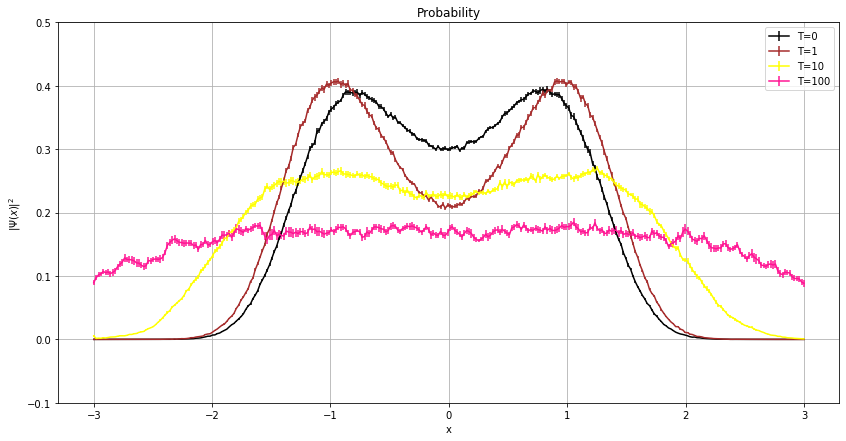

In [9]:
x = np.linspace(-3,3,300)

histo, err =np.loadtxt("probability.01", usecols=(1,2), unpack=True)
histo1, err1=np.loadtxt("probability.1", usecols=(1,2), unpack=True)
histo2, err2=np.loadtxt("probability.10", usecols=(1,2), unpack=True)
histo3, err3=np.loadtxt("probability.100", usecols=(1,2), unpack=True)

fig=plt.figure(figsize=(14,7))
plt.errorbar(x, histo, yerr=err, color="black", label="T=0")
plt.errorbar(x, histo1, yerr=err1, color="brown", label="T=1")
plt.errorbar(x, histo2, yerr=err2, color="yellow", label="T=10")
plt.errorbar(x, histo3, yerr=err3, color="deeppink", label="T=100")

plt.xlabel('x')
plt.ylabel('$|\Psi(x)|^2$')
plt.title("Probability")
plt.ylim((-0.1,0.5))
plt.legend()
plt.grid(True)

plt.show()